# Creating a design matrix using numpy
## Taryn Michael
##  201800323 
## 05/04/2021
##  Advanced Machine Learning 

In [5]:
import numpy as np #to call on functions to create arrays
import matplotlib.pyplot as plt #for plotting the functions

In [6]:
n = 200 #number of observations
θ_0 = 3.5 #intercept
θ_1 = 7 #slope
x = np.random.uniform(30,0,n) #x values
y = θ_0 + θ_1 * x #actual y
ϵ = np.random.normal(0,2,n) #error
y_e = y + ϵ

In [20]:
class LinReg:

    def __init__(self):
        self.X = None

    def design_Matrix(self,x):
        self.X = np.c_[np.ones(len(x)), x] #the first column is ensured to contain ones and combines it with the nxm matrix of x values to form design matrix
        return self.X 
    
    def ols(self, X, y, mean, sd): #predict learning parameters using the OLS method
        e = np.random.normal(mean, sd, len(x)) #obtain error to model noise
        y_e = y + e 
        self.learn_par = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_e) #predicted learning parameters
        return self.learn_par
    
    
    def mle(self,var,X, x, y): #predict learning parameters using MLE method
        y = np.random.normal(y, var) #y depicted to be a normal distribution
        self.learn_par_mle = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #predicted learning parameters
        return self.learn_par_mle
    

    
    def plot_linReg(self, θ,x, y, y_e, y_n):
        var = (1/len(x))*(y_e-X.dot(θ)).T.dot(y_e-X.dot(θ)) #variance of function
        plt.figure(figsize=(5,5))
        plt.title('Linear Regression')
        plt.xlabel('feature values')
        plt.ylabel('target values')
        plt.plot(x,y_e, '.',label = 'data to be fitted')
        plt.plot(x,y_n, label = "fitted line") 
        plt.plot(x, y_n + var[1], label = 'var upper bound')
        plt.plot(x,y_n - var[0], label = 'var lower bound')
        plt.legend()
        plt.show()

In [21]:
Z = LinReg()

In [22]:
X = Z.design_Matrix(x)

In [23]:
learn_par = Z.ols(X, y,0,2)
learn_par

array([3.22538666, 7.03335415])

In [24]:
y_n = X.dot(learn_par)

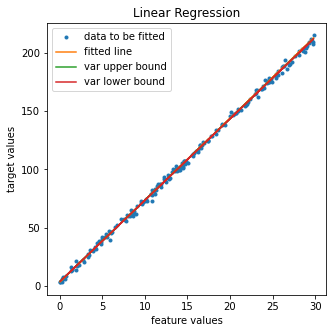

In [25]:
Z.plot_linReg(x,y, y_e,y_n)

In [26]:
Z.θ_0 = 1
Z.θ_1 = 3
learn_par_mle = Z.mle(4, X,x,y)
y_mle = X.dot(learn_par_mle)
print(learn_par_mle)

[3.25635704 7.0102717 ]


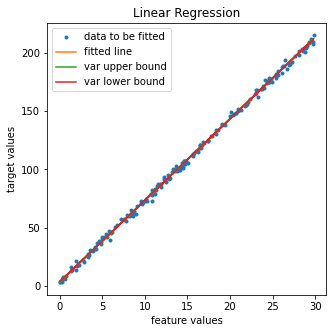

In [27]:
Z.plot_linReg(x,y, y_e,y_mle)